Problem Statement :  UTIVA AI SCHOOL COHORT INCLASS COMPETITION

This competition serves the purpose of the regular Hackathon organized by Utiva after every program, so the purpose of the competition is to help students test their knowledge of the concepts taught in class and also used to determine the overall best performing student in the cohort.

CASE STUDY : EMPLOYEE ATTRITION CONTROL

You have been provided with a fictitious data of a company X that is currently having challenge of controlling attrition. The data contains information about "Existing employees" and "Employees who have left". You have been called in by the company as a skilled Data Scientist to use your machine learning skills to study the pattern of attrition. With this insight, you can determine the important features among the available features that can be used to predict which employee will leave next or not.

The dataset contains these variables as explained below:
EmployeeID : System generated Unique ID
Satisfaction Level : Employee satisfaction level on a scale of 0-1
Last evaluation : The last evaluation rate of the employee on a scale of 0-1
Number of projects : Number of projects the employee is working on or worked on
Average monthly hours : The number of hours the employee work
YearofRecruitment : The year that each staff was recruited into the company
Work Accident: An indicator whether they have had a work accident. If Yes, it is a 1 and if No it is a 0.
Promoted: An indicator whether they have had a promotion in the last 5 years. If Yes, it is a 1 and if No it is a 0.
Departments : Operational department where each employee works
Salary : How much each employee earn
Status : The target which is an indicator whether they were promoted or not. If Yes, it is a 1 and if No it is a 0

Goal :It is your job to predict if an employee will leave or not.

For each in the test set, you must predict a 0 or 1 value for the variable.

Evalution Metric is Accuracy

In [0]:
#mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#installing catboost
!pip install catboost

     |████████████████████████████████| 64.4MB 62kB/s 


In [0]:
#Importing the libraries
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cbs
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# Importing the dataset
train_dataset = pd.read_csv('/content/gdrive/My Drive/KaggleProjects/utiva-python-bigdata-cohort1/data/train.csv')

EDA (Exploratory Data Analysis)

In [0]:
#getting into dataset
train_dataset.head()

Emp ID  satisfaction_level  last_evaluation  ...   dept  salary  Status
0       1                0.58             0.74  ...  sales     low       0
1       2                0.82             0.67  ...  sales     low       0
2       3                0.45             0.69  ...  sales     low       0
3       4                0.78             0.82  ...  sales     low       0
4       5                0.49             0.60  ...  sales     low       0

[5 rows x 11 columns]

In [0]:
#checking dataset info
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10434 entries, 0 to 10433
Data columns (total 10 columns):
satisfaction_level       10434 non-null float64
last_evaluation          10434 non-null float64
number_project           10434 non-null int64
average_montly_hours     10434 non-null int64
time_spend_company       10434 non-null int64
Work_accident            10434 non-null int64
promotion_last_5years    10434 non-null int64
dept                     10434 non-null object
salary                   10434 non-null object
Status                   10434 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 815.3+ KB


- Here Status is Target , reset of all independent avriables , 
- EMP Id we need to drop it
- time_spend_company ,number_project, Work accident,promotion last 5years,dept,salary are categorical variables

In [0]:
#dropping emp id
train_dataset.drop(columns='Emp ID',inplace=True)

#summary statistics
train_dataset.describe().T

count        mean        std  ...     50%     75%    max
satisfaction_level     10434.0    0.612099   0.249433  ...    0.64    0.82    1.0
last_evaluation        10434.0    0.716430   0.171503  ...    0.72    0.87    1.0
number_project         10434.0    3.802760   1.232802  ...    4.00    5.00    7.0
average_montly_hours   10434.0  200.919111  49.681774  ...  200.00  245.00  310.0
time_spend_company     10434.0    3.490033   1.449077  ...    3.00    4.00   10.0
Work_accident          10434.0    0.145773   0.352896  ...    0.00    0.00    1.0
promotion_last_5years  10434.0    0.020797   0.142712  ...    0.00    0.00    1.0
Status                 10434.0    0.237109   0.425330  ...    0.00    0.00    1.0

[8 rows x 8 columns]

- Very few people has satisfaction level of > 70
- Most of the people work on 2-5 projects at a time
- People who handle more porject they working hours are more in company 

In [0]:
#lets check is there any null values or not
train_dataset.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
Status                   False
dtype: bool

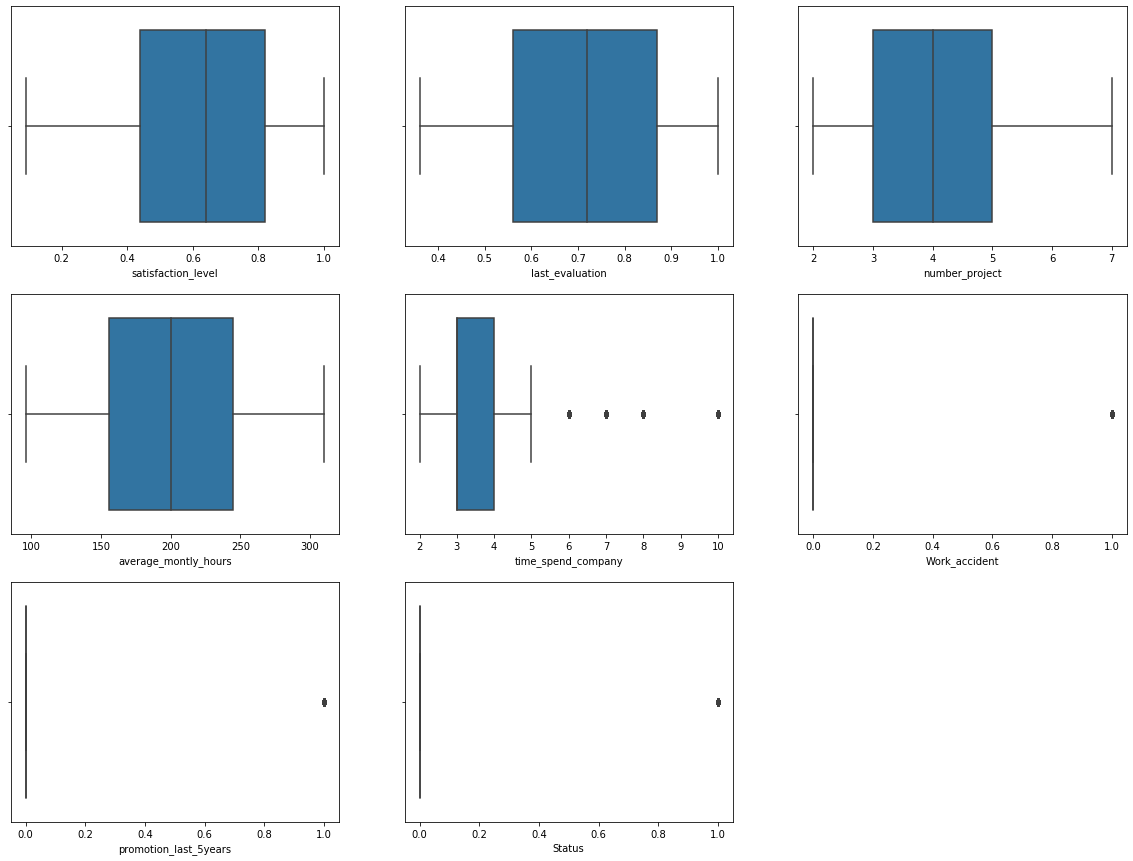

In [0]:
#lets check any outlier is there 
plt.figure(figsize=(20,15))
j = 0
for i in train_dataset.columns:
  if train_dataset[i].dtypes != 'object':
    j+=1
    plt.subplot(3,3,j)
    sb.boxplot(train_dataset[i])
    plt.xlabel(i)
plt.show() 

- time_spend_company ,number_project, Work accident,promotion last 5years,dept,salary are categorical variables is categorical variables so no need to worry about that
- No outlier present

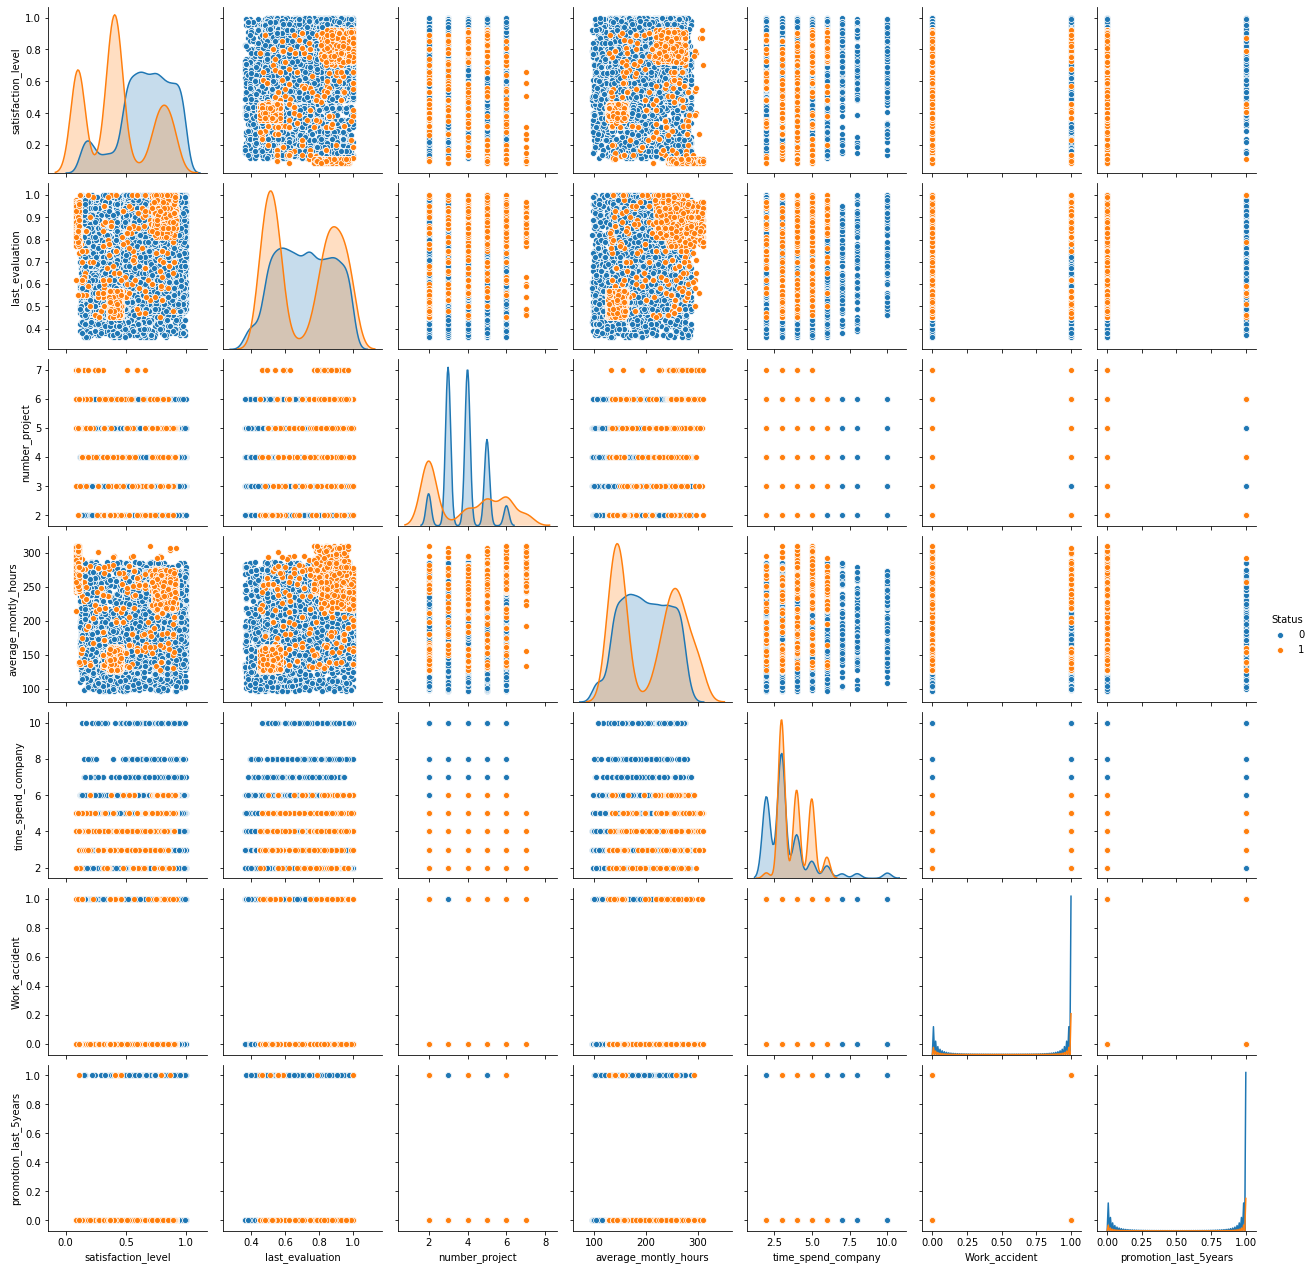

In [0]:
#let's do detail analysis

sb.pairplot(train_dataset,hue='Status',diag_kind='kde')

- Unable to find any pattern 
- The only thing we can find that datatset is highly imbalance so we need to balanced using smote

In [0]:
train_dataset.head()

satisfaction_level  last_evaluation  number_project  ...   dept  salary  Status
0                0.58             0.74               4  ...  sales     low       0
1                0.82             0.67               2  ...  sales     low       0
2                0.45             0.69               5  ...  sales     low       0
3                0.78             0.82               5  ...  sales     low       0
4                0.49             0.60               3  ...  sales     low       0

[5 rows x 10 columns]

In [0]:
#lets seperate dependent and independent variable

x = train_dataset.drop(columns='Status')
y = train_dataset['Status']

In [0]:
#lets assign lables to categorical cloumsn
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

x.loc[:,['dept','salary']] = x.loc[:,['dept','salary']].apply(lb.fit_transform)


In [0]:
x.head()

satisfaction_level  last_evaluation  ...  dept  salary
0                0.58             0.74  ...     7       1
1                0.82             0.67  ...     7       1
2                0.45             0.69  ...     7       1
3                0.78             0.82  ...     7       1
4                0.49             0.60  ...     7       1

[5 rows x 9 columns]

In [0]:
#upscaling the data
sm = SMOTE(random_state=12)
x_up , y_up = sm.fit_resample(x,y) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
x_train,y_train = x_up,y_up

In [0]:
#let buildmodel

#defining tunning parameter
params = {
    'learning_rate' : [0.1,0.001,0.01],
    'max_depth': [3,5,7,11],
    'min_child_weight' : [1,2,3,5],
    'lamdba':[0.5,1,2,0.2,0.3],
    'gamma':[0.1,0.2,0.3],
    'scale_pos_weight' : [1,3,2,0.5],
    'subsample':[0.5,1],
    'n_estimators':[1000],
    'early_stopping_rounds':[2],
    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9 ],
    'num_boost_round' :[999]
}


#defining model
classifier = xgb.XGBClassifier()

#cross calidation fold for data validation 
stf = StratifiedKFold(n_splits=5,shuffle=True,random_state=123)

#parameter tunning algo
random = RandomizedSearchCV(estimator=classifier,param_distributions=params,n_iter=10,scoring='accuracy',cv=stf,verbose=1,n_jobs=-1)


In [0]:
#fitting the model
random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='bin...
                                        'early_stopping_rounds': [2],
                                        'gamma': [0.1, 0.2, 0.3],
                                        'lamdba': [0.5, 1, 2, 0.2, 0.3],
                                     

In [0]:
from joblib import dump,load

dump(random.best_estimator_,'/content/gdrive/My Drive/KaggleProjects/utiva-python-bigdata-cohort1/xgboost_model.joblib')

['/content/gdrive/My Drive/KaggleProjects/utiva-python-bigdata-cohort1/xgboost_model.joblib']

In [0]:
#lets use lightgbm 
"""
#defining fetaures and categorical features need for lightgmb 
features_name = x.columns
categorical_feature = [i for i in x.columns if x[i].dtypes == 'object']

lgb_train = lgb.Dataset(x_train, y_train
 ,feature_name = features_name
 , categorical_feature = categorical_feature
) """

"\n#defining fetaures and categorical features need for lightgmb \nfeatures_name = x.columns\ncategorical_feature = [i for i in x.columns if x[i].dtypes == 'object']\n\nlgb_train = lgb.Dataset(x_train, y_train\n ,feature_name = features_name\n , categorical_feature = categorical_feature\n) "

In [0]:
#defining parameter

params_lgbm = {
 'learning_rate': [0.1,0.01,0.001,0.05],
 'max_depth':[3,5,7,11,13],
 'num_leaves': [15,30,50],
 'feature_fraction': [0.5,0.9,0.7],
 'bagging_fraction': [0.5,0.3,0.7],
 'bagging_freq': [20,40,50],
 'num_iterations':[50],
 'verbose': [-1],
 'min_child_weight' : [1,2,3,5],
 'colsample_bytree':[0.5,0.6,0.7,0.8,0.9 ],
 'num_boost_round' :[999],
 'reg_alpha': [0, 1e-1, 1, 2, 5],
 'reg_lambda': [0, 1e-1, 1, 5],
 'scale_pos_weight' : [1,3,2,0.5],
 'subsample':[0.5,1],
 'n_estimators':[1000]

}

lgbm = lgb.LGBMClassifier()

#parameter tunning algo
lgbm_random = RandomizedSearchCV(estimator=lgbm,param_distributions=params_lgbm,n_iter=5000,scoring='accuracy',cv=stf,verbose=1,n_jobs=-1)



In [24]:
lgbm_random.fit(x_train,y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=...
                                        'max_depth': [3, 5, 7, 11, 13],
                                        'min_child_weight': [1, 2, 3, 5],
                                        'n_estimat

In [25]:
dump(lgbm_random.best_estimator_,'/content/gdrive/My Drive/KaggleProjects/utiva-python-bigdata-cohort1/lightgbm_model.joblib')

['/content/gdrive/My Drive/KaggleProjects/utiva-python-bigdata-cohort1/lightgbm_model.joblib']

In [0]:
#lets build catboostclassification

catboost = cbs.CatBoostClassifier(custom_loss=['AUC','Accuracy'])

cat_param = {'learning_rate':[0.01,0.001,0.1,0.05,0.03],
             'depth':[3,5,7,9,11],
            'iterations':[2000],
            'verbose':[1],
             'early_stopping_rounds':[5],
             'l2_leaf_reg':[1,3,5,7,10],
             'random_strength':[1,2,3,4,5],
             'bagging_temperature':[1,2,3,5,7],
             'random_seed':[256]  
}



In [38]:
catboost.fit(x_train,y_train,verbose=False)

In [41]:
"""randomized_search_result = catboost.randomized_search(cat_param,
                                                   X=x_train,
                                                   y=y_train,
                                                   cv=5,
                  n_iter=100,
                  partition_random_seed=0,
                  calc_cv_statistics=True, 
                  search_by_train_test_split=True,
                  refit=True, 
                  shuffle=True, 
                  stratified=True, 
                  train_size=0.8, 
                  plot=True)"""

'randomized_search_result = catboost.randomized_search(cat_param,\n                                                   X=x_train,\n                                                   y=y_train,\n                                                   cv=5,\n                  n_iter=100,\n                  partition_random_seed=0,\n                  calc_cv_statistics=True, \n                  search_by_train_test_split=True,\n                  refit=True, \n                  shuffle=True, \n                  stratified=True, \n                  train_size=0.8, \n                  plot=True)'

In [42]:
random.best_score_

0.9907035175879397

In [43]:
lgbm_random.best_score_

0.9849246231155779

In [0]:
# try generate submission file

test_dataset = pd.read_csv('/content/gdrive/My Drive/KaggleProjects/utiva-python-bigdata-cohort1/data/train.csv')

In [46]:
test_dataset.head()

Emp ID  satisfaction_level  last_evaluation  ...   dept  salary  Status
0       1                0.58             0.74  ...  sales     low       0
1       2                0.82             0.67  ...  sales     low       0
2       3                0.45             0.69  ...  sales     low       0
3       4                0.78             0.82  ...  sales     low       0
4       5                0.49             0.60  ...  sales     low       0

[5 rows x 11 columns]

In [0]:
import copy

submission_file = copy.deepcopy(test_dataset)

In [0]:
submission_file.drop(columns=['Emp ID','Status'],inplace=True)
submission_file.loc[:,['dept','salary']] = submission_file.loc[:,['dept','salary']].apply(lb.fit_transform)

In [0]:
y_predict_lgbm = lgbm_random.predict(submission_file)

In [0]:
y_predict_xgboost = random.predict(submission_file.values)

In [0]:
test1 = copy.deepcopy(test_dataset)
test1['xgboost_predict'] = y_predict_xgboost
test1['light_predict'] = y_predict_lgbm

In [0]:
test1.to_csv('/content/gdrive/My Drive/KaggleProjects/utiva-python-bigdata-cohort1/data/submission.csv')